# STATISTICS & MACHINE LEARNING

## Apply Naive Bayes and Linear discrimant analysis (LDA)


## Question:

## Apply naive Bayes and Linear discriminant analysis to a dataset of your choosing. Compare the two model fits.

*** Let's get started with our analysis.***

*** We will firstly try and fit model to our dataset. ***

### 1) Naive Bayes Classifier using Gausssian fit

- Naive Bayes Classifier is a Supervised learing approach
- It is an intuitive method which uses probabilities of each attribute belonging to each class to make predictions

In [340]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

*** Now we import our dataset on which we need to carrry out our analysis. ***

In [341]:
# Importing the dataset
df = pd.read_csv('C:/Users/kshit/Documents/SPRING 2018/Machine Learning and Statistics/Menu.csv')
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values


df.head()

,Calories,Carbohydrates,Protein,Calcium,Category
0,300,31,17,25,1
1,250,30,18,25,1
2,370,29,14,25,1
3,450,30,21,30,1
4,400,30,21,25,1


*** We split the dataset into training data and test data.***

*** We will use training data to fit our classifier and then check if the classifier works fine for testing data.***

In [342]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [343]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


*** We fit the Naive Bayes to training set***

In [344]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


GaussianNB(priors=None)

In [345]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

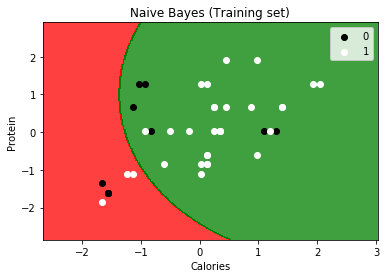

In [346]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.02),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('black', 'white'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Calories')
plt.ylabel('Protein')
plt.legend()
plt.show()

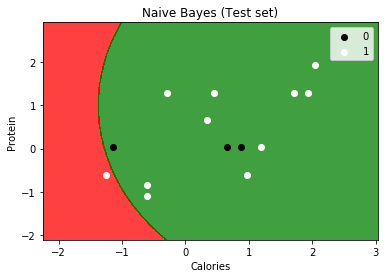

In [347]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('black', 'white'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Calories')
plt.ylabel('Protein')
plt.legend()
plt.show()

*** Finally, we find out the accuracy of the model.***

In [348]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7142857142857143

*** We get the accuracy score as 71 % which is pretty good for a small dataset which we have chosen.***

### 2) Linear Discriminant Analysis (LDA)

- Linear Discriminant Analysis (LDA) is a dimension reduction technique that can be used for classification as well
- Such techniques can primarily be used to reduce the dimensionality for high-dimensional data.

In [314]:
from sklearn import cross_validation
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from matplotlib import colors
y = df.values[:, 3]
A = df.values[:, 0:2]

In [322]:
import warnings
warnings.filterwarnings("ignore")

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_train, y_train)
drA = lda.transform(X_train)

In [351]:
lda = LinearDiscriminantAnalysis()
k_fold = cross_validation.KFold(len(X_train), 3, shuffle=True)
print('LDA Results: ')

for (trn, tst) in k_fold:
    lda.fit(X_train, y_train)
    outVal = lda.score(X_train, y_train)

    

print('Accuracy Score: ' + str(outVal))

LDA Results: 
Accuracy Score: 0.90243902439


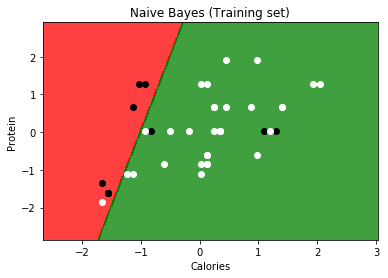

In [350]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.02),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lda.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('black', 'white'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Calories')
plt.ylabel('Protein')
#plt.legend()
plt.show()

### Comparison between two models

- Below we have accuracies of both the models use

### Accuracy for Naive Bayes : 71%
### Accuracy for LDA : 90 %

*** Therefore, we conclude that Naive Bayes performs well for the Menu dataset which we have chosen.***

### References :
- https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/
- http://goelhardik.github.io/2016/10/04/fishers-lda/    